# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

Nama : Fahmi Hamzah dan Hillidatul Ilmi

Batch : FTDS-012

Kelompok : Final Project Kelompok 1

Dataset : Harga Hotel ClickSpace. Dataset ini berasal dari scarping data secara manual untuk pembuatan aplikasi website ClickSpace.

Objective : Tujuan dari kumpulan data adalah untuk memprediksi harga hotel, berdasarkan pengukuran dari beberapa variabel fitur seperti Nama Hotel, Nama Kota, Provinsi, Latitude, Longitude, Luas Kamar, Kapasitas	dan Rating. Berdasarkan hal ini, maka kami akan menanalisis kisaran harga hotel dengan metode Linear Regression.

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Mendefinisikan Libraries

# library memangil dataset dan data
import pandas as pd
import numpy as np 

# library visualisasi data 
!pip install folium
import folium
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

# library preprocessing data
!pip install feature-engine
from sklearn.model_selection import train_test_split 
from feature_engine.outliers import Winsorizer 
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

# library model algoritma
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.pipeline import Pipeline

# librry evaluation model algoritma
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


library yang akan kami gunakan untuk mengerjakan final project mengenai harga hotel ini dari library numpy, pandas, matplotlib, seaborn dan beberapa modul sklearn yang bervariasi untuk penggunaan dalam mendukung jalannya suatu model.

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Menampilkan data yang akan digunakan dalam analisis atau memuat dari kumpulan data 
data = pd.read_csv('https://raw.githubusercontent.com/H8-Assignments-Bay/p2---final-project-ftds-012-group-001/main/dataset/detailhotel_modif.csv')
data

,Unnamed: 0,Nama Hotel,Nama Kota,Provinsi,Latitude,Longitude,Luas Kamar,Kapasitas,Rating,Harga
0,0,grandkemang Hotel,Kota Jakarta Selatan,Daerah Khusus Ibukota Jakarta,-6.255564,106.810793,22,3,4.03,543750
1,1,Royal Kuningan Hotel,Kota Jakarta Selatan,Daerah Khusus Ibukota Jakarta,-6.209102,106.830704,30,4,4.42,609768
2,2,The Grove Suites by GRAND ASTON,Kota Jakarta Selatan,Daerah Khusus Ibukota Jakarta,-6.220000,106.835112,34,2,4.58,1134955
3,3,Millennium Hotel Sirih Jakarta,Kota Jakarta Pusat,Daerah Khusus Ibukota Jakarta,-6.180000,106.816708,30,1,4.05,764599
4,4,Aryaduta Suite Semanggi,Kota Jakarta Selatan,Daerah Khusus Ibukota Jakarta,-6.217762,106.816398,32,3,4.42,1057500
...,...,...,...,...,...,...,...,...,...,...
1496,1496,PIA Hotel Cirebon,Kota Cirebon,Jawa Barat,-6.709959,108.550699,15,3,4.25,225000
1497,1497,Hotel Syariah Cordova,Kota Cirebon,Jawa Barat,-6.704522,108.557343,38,3,3.15,154630
1498,1498,Hotel Victory Cirebon,Kabupaten Cirebon,Jawa Barat,-6.710000,108.539290,17,2,4.00,289750
1499,1499,Aurora Hotel Siliwangi,Kota Cirebon,Jawa Barat,-6.707524,108.559091,35,2,4.05,228000


Dataset Harga Hotel terdiri dari 10 kolom dengan 9 parameter fitur, 1 parameter target dengan identifikasi unik 1501 pengamatan kisaran harga. Sembilan kolom tersebut adalah sebagai berikut :
- Nama Hotel : Fitur ini memberikan informasi mengenai nama-nama hotel yang menyediakan jasa inap dan juga menyediakan makanan dan minuman bagi tamu yang datang serta mempunyai fasilitas jasa lannya. Yang mana semua fasilitasnya juga di peruntukkan bagi masyarakat umum.
- Nama Kota : Fitur ini memberikan informasi mengenai wilayah dari permukiman yang meyediakan fasilitas seperti hotel, untuk tempat inap parawisatawan.
- Provinsi : Fitur ini memberikan informasi mengenai wilayah tersturktur yang tersedia berbagai macam aktivitas, seperti hotal tempat persedian inap parawisatawan.
- Latitude : Latitude atau Garis Lintang adalah garis yang menentukan jarak di sebelah utara atau selatan Khatulistiwa, tempat koordinat lokasi hotel.
- Longitude atau Garis Bujur adalah garis yang membentang dari utara ke selatan, tempat koordinat lokasi hotel. 
- Luas Kamar : Fitur ini memberikan infomasi mengenai luas ruangan tempat penginapan dari panjang dan bangunan kamar hotel dengan satuan meter persegi (m2).
Kapasitas : fitur ini memberikan informasi mengenai daya tampung yang bisa di isi oleh parawisatawan dalam luas kamar hotel.
- Rating : fitur ini suatu penilaian yang terstandarisasi terhadap fasilitas dan keyamanan hotel berdasarkan pengalaman parawisatawan sebelumnya yang telah merasakan tempat penginapan tersebur.

In [3]:
# Duplicate Data
data_copy = data.copy()

Mengandakan(duplicate) dataset nya, jika ada perubahan kolom atau atribut tetap bisa dibandingkan dengan dataset asli. Fungsi dari pengandaan agar data asli masih bisa digunakan jika ada beberapa perubahan isi dari dataset.

In [4]:
# Mengecek ukuran dataset yang akan digunakan
print(data.shape)

(1501, 10)


Berdasarkan perintah .shape bahwa ukuran dataset harga hotel terdiri dari 1501 baris dan 10 kolom.

In [5]:
# Melihat Nama-Nama kolom dari tabel dataset kartu kredit default
data.columns

Index(['Unnamed: 0', 'Nama Hotel', 'Nama Kota', 'Provinsi', 'Latitude',
       'Longitude', 'Luas Kamar', 'Kapasitas', 'Rating', 'Harga'],
      dtype='object')

Nama-Nama kolom telah dideskripsikan sebelumnya, kolom-kolom ini memiliki nilai ukuran yang berbeda-beda setiap hotel.

In [49]:
data['Nama Kota'].unique()

array(['Kota Jakarta Selatan', 'Kota Jakarta Pusat', 'Kota Jakarta Barat',
       'Kota Jakarta Timur', 'Kota Jakarta Utara', 'Kota Tangerang',
       'Kota Bekasi', 'Kota Bandung', 'Kabupaten Bandung Barat',
       'Kabupaten Subang', 'Kabupaten Sumedang', 'Kabupaten Bandung',
       'Kota Cimahi', 'Kota Surabaya', 'Kabupaten Sidoarjo',
       'Kabupaten Sleman', 'Kota Yogyakarta', 'Kabupaten Bantul',
       'Kabupaten Gunung Kidul', 'Kota Medan', 'Kabupaten Deli Serdang',
       'Kota Semarang', 'Kabupaten Semarang', 'Kota Malang',
       'Kabupaten Malang', 'Kota Batu', 'Kabupaten Magelang',
       'Kabupaten Badung', 'Kabupaten Gianyar', 'Kabupaten Buleleng',
       'Kabupaten Lombok Barat', 'Kabupaten Lombok Tengah',
       'Kota Mataram', 'Kabupaten Lombok Pusat', 'Kota Denpasar',
       'Kabupaten Lombok Utara', 'Kuta', 'Kuta Lombok',
       'Kabupaten Jembrana', 'Kabupaten Klungkung',
       'Kabupaten Lombok Timur', 'Lombok', 'Kabupaten Karangasem',
       'Kabupaten Bangli', 

In [6]:
# Mengecek informasi dataset dari tabel kartu kredit default
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1501 non-null   int64  
 1   Nama Hotel  1501 non-null   object 
 2   Nama Kota   1501 non-null   object 
 3   Provinsi    1501 non-null   object 
 4   Latitude    1501 non-null   float64
 5   Longitude   1501 non-null   float64
 6   Luas Kamar  1501 non-null   int64  
 7   Kapasitas   1501 non-null   int64  
 8   Rating      1501 non-null   float64
 9   Harga       1501 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 117.4+ KB


Berdasarkan perintah data.info() bahwa tabel harga hotel memiliki sekitar 10 kolom, dimana kolom Nama Hotel, Nama Kota dan Provinsi teridentifikasi sebagai type object atau kolom string. Sedangkan kolom Latitude, Longitude, Luas Kamar, Kapasitas, Rating dan Harga teridentifikasi sebagai type float/int atau kolom numerik.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

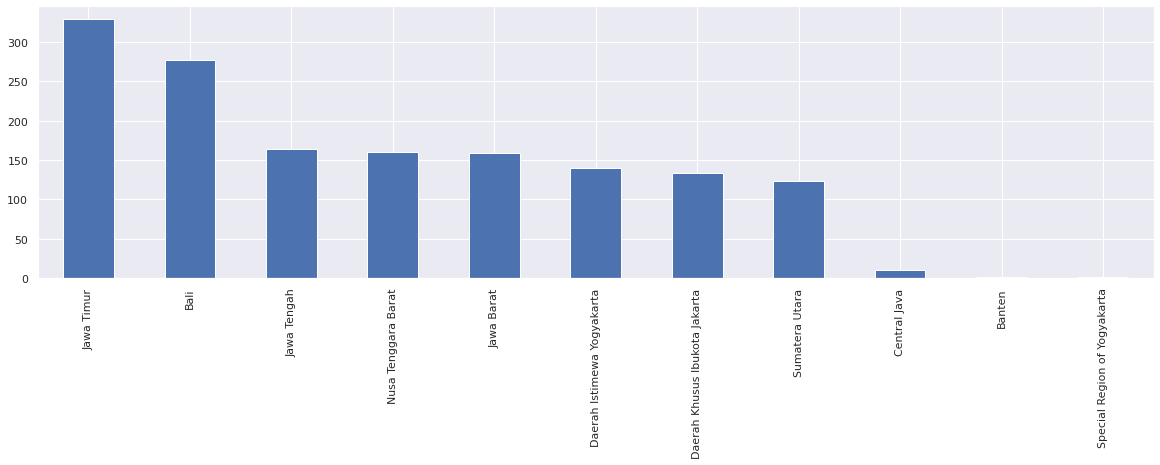

In [7]:
# Visualisasi diagram batang mengenai beberapa provinsi yang memiliki tempat penginapan hotel
sns.set_theme(style="darkgrid")
data['Provinsi'].value_counts().plot(kind='bar',figsize=(20,5))

Berdasarkan hasil visualisasi bahwa provinsi Jawa timur lebih memiliki banya referensi tempat hotel yang bisa menjadi pilihan untuk tempat menginap dibandingkan provinsi lainnya, urutan kedua provinsi bali sebagai jumlah hotel yang memiliki beberapa referensi tempat penginapan, lalu diikuti beberapa provinsi lainnya. Kabupaten Bandung menempati tempat terakhir yang memiliki sediki tempat hotel yang bisa di inap oleh parawisataan.

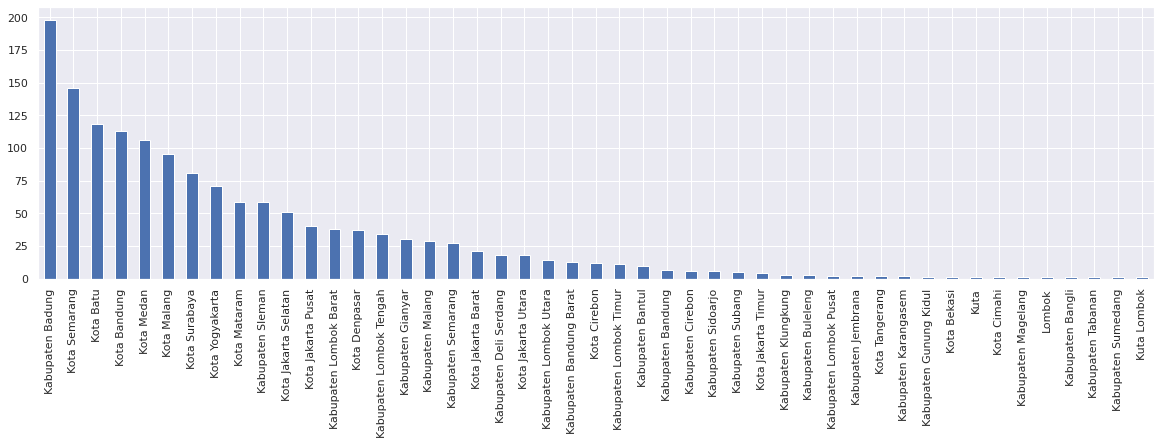

In [8]:
# Visualisasi diagram batang mengenai beberapa kota yang memiliki tempat penginapan hotel
data['Nama Kota'].value_counts().plot(kind='bar',figsize=(20,5))

Berdasarkan hasil visualisasi bahwa Kabupaten Bandung lebih memiliki banya referensi tempat hotel yang bisa menjadi pilihan untuk tempat menginap dibandingkan provinsi lainnya, urutan kedua Kota Semarang sebagai jumlah hotel yang memiliki beberapa referensi tempat penginapan, lalu diikuti beberapa provinsi lainnya. Malang city menempati tempat terakhir yang memiliki sediki tempat hotel yang bisa di inap oleh parawisataan.

In [9]:
# Melihat perbandingan kisaran harga hotel di beberapa provinsi indonesia
print(data.groupby(by=['Provinsi'])['Harga'].mean().sort_values(), '\n')

Provinsi
Central Java                     1.504783e+05
Sumatera Utara                   2.430041e+05
Banten                           4.495100e+05
Jawa Tengah                      4.721973e+05
Jawa Timur                       5.169394e+05
Nusa Tenggara Barat              5.959141e+05
Daerah Istimewa Yogyakarta       6.304164e+05
Jawa Barat                       7.947998e+05
Daerah Khusus Ibukota Jakarta    8.319768e+05
Special Region of Yogyakarta     9.500000e+05
Bali                             1.309811e+06
Name: Harga, dtype: float64 



Berdasarkan hasil visualisasi, bahwa Provinsi Bali memiliki kisaran harga rata-rata yang biayanya lebih mahal dibandingkan provinsi lainnya yaitu Rp. 1.309.811, Provinsi West Nusa Tenggara memiliki kisaran harga rata-rata yang biayanya di urutan kedua yaitu Rp. 950.000. Terlihat bahwa indonesia bagian tengah atau pulau wilayah sekitaran Nusa Tenggara memiliki harga hotel yang biayanya sangat tinggi. Sedangkkan North Sumatra memiliki kisaran harga hotel yang sangat murah jika dibandingkan provinsi lainnya yaitu Rp. 150.478.

In [10]:
# Melihat perbandingan luas kamar hotel di beberapa provinsi indonesia
print(data.groupby(by=['Provinsi'])['Luas Kamar'].mean().sort_values(), '\n')

Provinsi
Banten                           17.000000
Central Java                     20.200000
Sumatera Utara                   22.112903
Jawa Tengah                      23.030488
Daerah Istimewa Yogyakarta       23.057143
Jawa Barat                       24.867925
Nusa Tenggara Barat              25.745342
Daerah Khusus Ibukota Jakarta    25.992537
Jawa Timur                       26.911854
Bali                             31.512635
Special Region of Yogyakarta     40.000000
Name: Luas Kamar, dtype: float64 



Berdasarkan hasil visualisasi, bahwa hotel di Provinsi Yogyakarta memiliki rata-rata luas kamar ruangan yang luas yaitu sekitar 40 m^2, jika dibandingkan provinsi lain. Sedangkan hotel di wilayah Banten memiliki rata-rata luas kamar ruangan yang kecil yaitu sekitar 17m^2.

In [11]:
# Melihat perbandingan kapasitas daya tampung hotel di beberapa provinsi indonesia
print(data.groupby(by=['Provinsi'])['Kapasitas'].mean().sort_values(), '\n')

Provinsi
Central Java                     2.200000
Sumatera Utara                   2.258065
Daerah Khusus Ibukota Jakarta    2.589552
Nusa Tenggara Barat              2.614907
Jawa Barat                       2.685535
Bali                             2.707581
Jawa Tengah                      2.762195
Daerah Istimewa Yogyakarta       2.864286
Banten                           3.000000
Special Region of Yogyakarta     3.000000
Jawa Timur                       3.231003
Name: Kapasitas, dtype: float64 



Berdasarkan hasil visualisasi, bahwa Provinsi Jawa Timur, Yogyakarta, Bandung memiliki rata-rata daya tampung dari semua hotel di wilayah tersebut sebanyak 3 orang. Sedangkan Provinsi North Sumatra dan Centrl Java memiliki rata-rata daya tampung dari semua hotel di wilayah tersebut sebanyak 2 orang.

In [12]:
# Hasil Statistika deskriptif terhadap fitur numerik
data.describe()[1:].T.style.background_gradient(cmap='Greens_r')

,mean,std,min,25%,50%,75%,max
Unnamed: 0,750.000000,433.445691,0.000000,375.000000,750.000000,1125.000000,1500.000000
Latitude,-4.694611,3.991544,-8.890000,-7.790000,-6.920000,-0.000000,3.772937
Longitude,3945925.161352,62305510.564896,98.607708,107.632386,112.512882,115.167470,988750710.000000
Luas Kamar,26.107928,10.150157,5.000000,18.000000,24.000000,32.000000,57.000000
Kapasitas,2.780147,1.263183,0.000000,2.000000,3.000000,3.000000,19.000000
Rating,4.154750,0.375801,2.100000,4.030000,4.080000,4.420000,5.250000
Harga,710110.518987,1050687.793600,49500.000000,247353.000000,401310.000000,720020.000000,14000000.000000


Berdasarkan hasil central tendency, diperoleh beberapa informasi sebagai berikut :
1. Kisaran Harga rata-rata hotel termahal yang ada di indonesia sebesar Rp. 14.000.000 sedangkan Harga rata-rata hotel termurah yang ada di indonesia sebesar Rp. 49.5000.
2. Luas Kamar sebesar 57 m^2 merupakan ukuran yang cukup besar untuk hotel berbentuk Villa keluarga.
3. Hotel di indonesia memiliki rating terbaik berupa bintang.
4. Kapasitas daya tampung yang ummumnya bisa untuk 19 orangg atau bisa lebih.

In [13]:
# menampilkan salah satu lokasi hotel
world_map = folium.Map(location=[-6.255564, 106.810793], zoom_start=8)
world_map

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 5a - Data Inference

Model inference merupakan data yang tidak tersedia di dalam dataset, jika dicari datanya tidak ada, maka di masukkan data baru. Jadi model inference itu data baru yang tidak ada di data set. Data inference menggunakan dataset yang ada. Dataset terbagi menjadi dua yaitu inference set dan Non inference set (Train set & Test set)

In [14]:
# Dapatkan Data untuk Inferensi Model
# Menggunakan pandas sampel dengan memangil 10 data random dan random_state digunakan agar random state yang terpilih tetap sama
datainfernce = data.sample(10, random_state=10) 
datainfernce

,Unnamed: 0,Nama Hotel,Nama Kota,Provinsi,Latitude,Longitude,Luas Kamar,Kapasitas,Rating,Harga
1109,1109,Villa Puncak Garuda E16 - Prathivi,Kota Batu,Jawa Timur,-7.902774e+00,112.540084,50,6,4.75,575000
56,56,Hotel Santika Premiere Hayam Wuruk Jakarta,Kota Jakarta Barat,Daerah Khusus Ibukota Jakarta,-6.148480e+00,106.816778,22,3,4.58,835000
1030,1030,Kuta Paradise,Kabupaten Lombok Tengah,Nusa Tenggara Barat,-8.894132e-01,116.285603,16,3,4.03,542700
550,550,The Palace Inn,Kota Medan,Sumatera Utara,3.586211e+00,98.666376,30,3,4.00,301205
861,861,Maya Ubud Resort & Spa,Kabupaten Gianyar,Bali,-8.510000e-08,115.275434,44,3,4.75,4266766
1116,1116,The Nyaman Bali,Kabupaten Badung,Bali,-8.730000e-08,115.172126,23,3,4.58,351500
647,647,Mahima Hotel,Kota Semarang,Jawa Tengah,-6.985492e+00,110.372531,24,3,4.03,558000
1263,1263,Se.juk Residence Araya,Kabupaten Malang,Jawa Timur,-7.940000e+00,112.671534,17,1,4.42,205000
87,87,Asyana Kemayoran Jakarta,Kota Jakarta Pusat,Daerah Khusus Ibukota Jakarta,-6.165128e+00,106.841667,18,2,4.42,417690
1451,1451,Mangsit Suite by Holiday Resort Lombok,Kabupaten Lombok Barat,Nusa Tenggara Barat,-8.490000e+00,116.047299,50,5,4.05,1755000


Dari sekumpulan informasi dataset harga hotel, terdapat 10 data yang diduga tidak masuk dalam kumpulan dataset atau tetapi terdapat di bagian data inference.

In [15]:
# Hapus Kumpulan Inferensi dari Kumpulan Data

data_train_test = data.drop(datainfernce.index)
data_train_test

,Unnamed: 0,Nama Hotel,Nama Kota,Provinsi,Latitude,Longitude,Luas Kamar,Kapasitas,Rating,Harga
0,0,grandkemang Hotel,Kota Jakarta Selatan,Daerah Khusus Ibukota Jakarta,-6.255564,106.810793,22,3,4.03,543750
1,1,Royal Kuningan Hotel,Kota Jakarta Selatan,Daerah Khusus Ibukota Jakarta,-6.209102,106.830704,30,4,4.42,609768
2,2,The Grove Suites by GRAND ASTON,Kota Jakarta Selatan,Daerah Khusus Ibukota Jakarta,-6.220000,106.835112,34,2,4.58,1134955
3,3,Millennium Hotel Sirih Jakarta,Kota Jakarta Pusat,Daerah Khusus Ibukota Jakarta,-6.180000,106.816708,30,1,4.05,764599
4,4,Aryaduta Suite Semanggi,Kota Jakarta Selatan,Daerah Khusus Ibukota Jakarta,-6.217762,106.816398,32,3,4.42,1057500
...,...,...,...,...,...,...,...,...,...,...
1496,1496,PIA Hotel Cirebon,Kota Cirebon,Jawa Barat,-6.709959,108.550699,15,3,4.25,225000
1497,1497,Hotel Syariah Cordova,Kota Cirebon,Jawa Barat,-6.704522,108.557343,38,3,3.15,154630
1498,1498,Hotel Victory Cirebon,Kabupaten Cirebon,Jawa Barat,-6.710000,108.539290,17,2,4.00,289750
1499,1499,Aurora Hotel Siliwangi,Kota Cirebon,Jawa Barat,-6.707524,108.559091,35,2,4.05,228000


In [16]:
data.shape

(1501, 10)

Ketika belum memisahkan data inference dari dataset bahwa, jumlah dataset awal harga hotel memiliki 1501 baris kemudian menghilangkan/memisahkan data inference dari dataset harga hotel berubah menjadi 1491 baris.

In [17]:
# Reset Index
# Agar tidak terjadi yang tidak diinginkan, data di reset index nya untuk keterurutan

data_train_test.reset_index(drop=True, inplace=True)
datainfernce.reset_index(drop=True, inplace=True)
datainfernce

,Unnamed: 0,Nama Hotel,Nama Kota,Provinsi,Latitude,Longitude,Luas Kamar,Kapasitas,Rating,Harga
0,1109,Villa Puncak Garuda E16 - Prathivi,Kota Batu,Jawa Timur,-7.902774e+00,112.540084,50,6,4.75,575000
1,56,Hotel Santika Premiere Hayam Wuruk Jakarta,Kota Jakarta Barat,Daerah Khusus Ibukota Jakarta,-6.148480e+00,106.816778,22,3,4.58,835000
2,1030,Kuta Paradise,Kabupaten Lombok Tengah,Nusa Tenggara Barat,-8.894132e-01,116.285603,16,3,4.03,542700
3,550,The Palace Inn,Kota Medan,Sumatera Utara,3.586211e+00,98.666376,30,3,4.00,301205
4,861,Maya Ubud Resort & Spa,Kabupaten Gianyar,Bali,-8.510000e-08,115.275434,44,3,4.75,4266766
5,1116,The Nyaman Bali,Kabupaten Badung,Bali,-8.730000e-08,115.172126,23,3,4.58,351500
6,647,Mahima Hotel,Kota Semarang,Jawa Tengah,-6.985492e+00,110.372531,24,3,4.03,558000
7,1263,Se.juk Residence Araya,Kabupaten Malang,Jawa Timur,-7.940000e+00,112.671534,17,1,4.42,205000
8,87,Asyana Kemayoran Jakarta,Kota Jakarta Pusat,Daerah Khusus Ibukota Jakarta,-6.165128e+00,106.841667,18,2,4.42,417690
9,1451,Mangsit Suite by Holiday Resort Lombok,Kabupaten Lombok Barat,Nusa Tenggara Barat,-8.490000e+00,116.047299,50,5,4.05,1755000


Dibagian data inference indexnya tidak terurut karena menyesuaikan letak baris dari data yang tidak termasuk dataset harga hotel, tetapi setelah di reset index jadi tersusun index nomornya. Dilakukan restart index, agar ketika dijalankan sampai bawah atau proses selesai jika ada keselahan hasil, sudah dipastikan bukan karena index nya berantakan atau tidak beraturan.

## 5b - Splitting Dataset

Splitting Data merupakan pemisahan untuk membuat X sebagai fitur dan Y sebagai target menjadi Train dan test. Train/test split sebagai salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. 

In [18]:
# Pemisahan `X` (Fitur) dan `y` (Target)

# Menghapus kolom axis=1 harga, untuk dimasukkan dan dibagi menjadi train/test
X = data_train_test.drop('Harga', axis=1) 
# Membuat variabel y untuk kolom target harga saja
y = data_train_test['Harga']

In [19]:
# Pisahkan antara Train-Set dan Test-Set (jika ingin dijadikan data inference)
# Memasukkan nilai x dan y, test_size artinya split 80% untuk train, dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (1192, 9)
Test Size :  (299, 9)


Dilakukan proses penghapusan kolom target harga untuk dialihkan sebagai training set dan testing set, dari data harga hotel yang telah dialihkan lalu akan dilakukan proses train_test_split dengan menjadi 80% golongan pendapatan masuk ke X_tarin dan 20% masuk ke X_test. X_train menggunakan 1192(80%) dari 1491 baris dan validation menggunakan 299(sisa 20%) dari 1491 baris.

## 5c - Feature Selection

Feature selection atau seleksi fitur dengan mengurangi jumlah fitur yang tidak relevan untuk menentukan kelas target. Feature selectian bisa memakai heatmap, mencari nilai korelasi antara kolom fitur dengan kolom target setinggi mungkin atau serendah mungkin. Mencari korelasinya yang mendekati 1 kalau nilainya nol bisa di drop karena tidak ada korelasinya kolom fitur dengan kolom target. Target berkeinginan harus ada korelasinya.

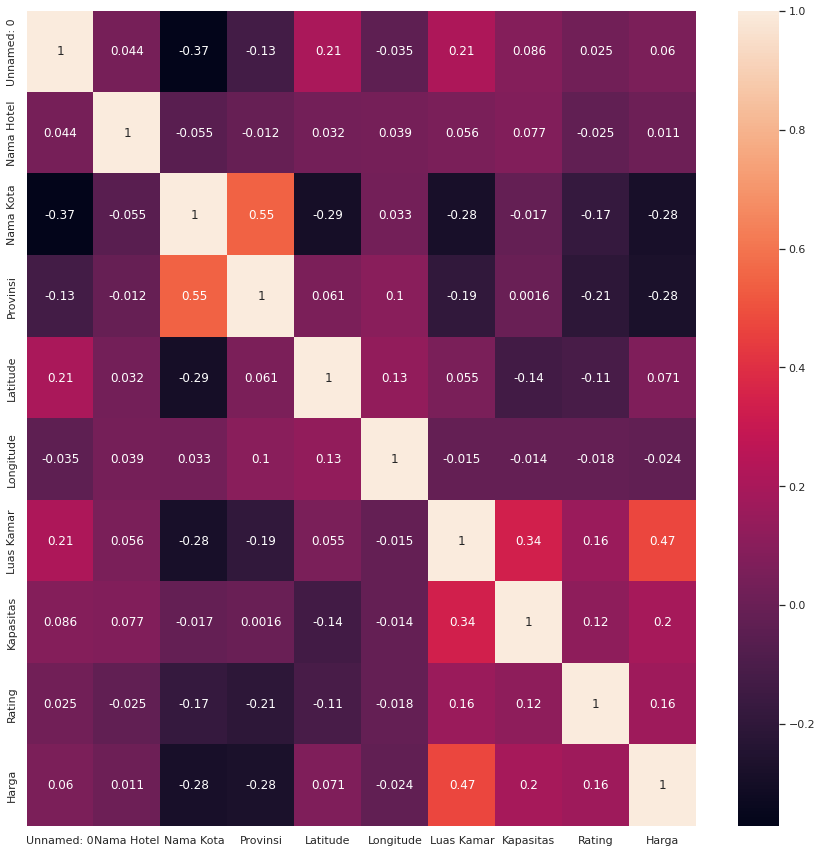

In [20]:
# Melihat Korelasi antara Fitur dengan target Churn
# Mengubah fitur menjadi kategorik terlebih dahulu agar bisa menhitung korelasi beberapa fitur terhadap target
encodedfitur = data.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
plt.figure(figsize =(15,15))
korelasi=encodedfitur[encodedfitur.columns].corr()
sns.heatmap(korelasi,annot=True)

Berdasarkan hasil korelasi beberapa fitur yang diduga mempengaruhi harga hotel mememiliki niai hubungan yang positif dan negatif. Maka secara personal personal judgment, tidak membutuhkan fitur Unnamed:0, latitude dan longitude dalam mempengaruhi harga hotel, sehingga di hapus ketiga fitur tersebut.

In [21]:
# Menghapus fitur-fitur yang tidak digunakan, hanya mengunakan fitur yang diduga mempengaruhi target
X_train.drop(["Unnamed: 0",'Latitude','Longitude'], axis=1, inplace=True)
X_test.drop(["Unnamed: 0",'Latitude','Longitude'], axis=1, inplace=True)

## 5d - Handling Missing Value

Missing value terjadi karena informasi untuk sesuatu tentang objek tidak diberikan, sulit dicari, atau memang informasi tersebut tidak ada. Pada proses ini akan dilakukan pengecekan data missing value dengan .info() terlebih dahulu :

In [22]:
# Mengecek Missing Values on X_train
X_train.isnull().sum()

Nama Hotel    0
Nama Kota     0
Provinsi      0
Luas Kamar    0
Kapasitas     0
Rating        0
dtype: int64

In [23]:
# Mengecek Missing Values on X_test
X_test.isnull().sum()

Nama Hotel    0
Nama Kota     0
Provinsi      0
Luas Kamar    0
Kapasitas     0
Rating        0
dtype: int64

In [24]:
# Mengecek Missing Values on y_train
y_train.isnull().sum()

0

In [25]:
# Mengecek Missing Values on y_test
y_test.isnull().sum()

0

Fitur-fitur yang ada di X_train, X_val, y_train dan y_val bahwa tidak terdapat missing value yang artinya sudah bersih dari Nan data. Selanjutnya akan dilakukan handling outlier.

## 5e - Handling Outlier

Untuk mengatasi nilai outlier, saya memilih metode Censoring. Censoring atau capping, berfungsi untuk membatasi distribusi maksimum atau minimum pada nilai yang berubah-ubah. Pengubahan skala agar masuk ke dalam boxplot. Saya tidak memilih metode Trimming atau penghapusan, agar dimensi ukuran metriks nya tetap sama dan jumlah data masih terjaga.

In [26]:
# Berfungsi untuk membuat histogram dan boxplot.
# Fungsi ini menggunakan kerangka data census_adult_income dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

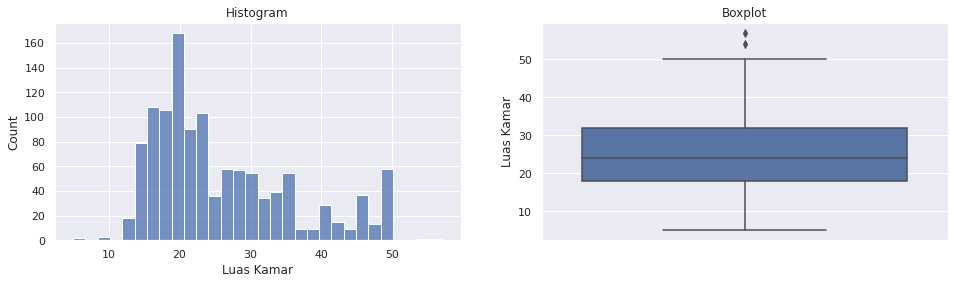


Skewness Value Luas Kamar :  0.9522760713808701


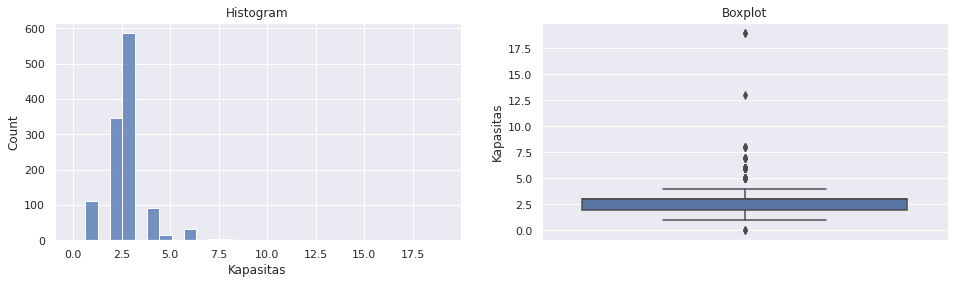


Skewness Value Kapasitas :  4.435480903524824


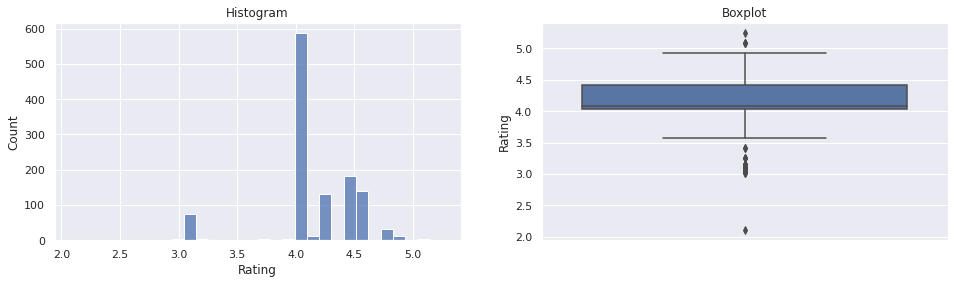


Skewness Value Rating :  -1.1515864044447346


In [27]:
# Mengecek Distribusi fitur dan outlier menggunakan Boxplot

diagnostic_plots(X_train, 'Luas Kamar')
print('\nSkewness Value Luas Kamar : ', X_train['Luas Kamar'].skew())

diagnostic_plots(X_train, 'Kapasitas')
print('\nSkewness Value Kapasitas : ', X_train['Kapasitas'].skew())

diagnostic_plots(X_train, 'Rating')
print('\nSkewness Value Rating : ', X_train['Rating'].skew())

Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2. Fitur Luas Kamar dan Rating, semua datanya berdistribusi normal karena memiliki nilai skewness yang sesuai standarnya.Fitur Kapasitas, semua datanya tidak berdistribusi normal karena memiliki nilai skewness yang tidak sesuai standarnya. Sedangkan Visualisasi boxplot fitur data numerik berupa Luas Kamar, Kapasitas dan Rating terdapat outlier di bagian upper boxplot dan lowwer boxplot/bagian atas dan bagian bawah boxplot. Sehingga perlu mencari nilai IQR untuk menyamakan range nilainya agar masuk ke dalam boxplot.

In [28]:
# Menghitung/menentukan nilai IQR untuk data yang terdapat outlier
X_train_ = Winsorizer(capping_method='iqr', # pilih iqr untuk batas aturan IQR atau gaussian untuk mean dan std
                          tail='both',
                          fold=1.5,
                          variables=['Luas Kamar','Kapasitas','Rating'])
X_train_.fit(X_train)
X_trainn = X_train_.transform(X_train) 

Proses Winsorizer, dilakukan untuk menyamakan range data menjadi sama sehingga tidak ada data oulier yang menjauhi himpunan data lainnya.


Luas Kamar - Setelah Handling Outlier Capping

Skewness Value Luas Kamar :  0.9466691928306001


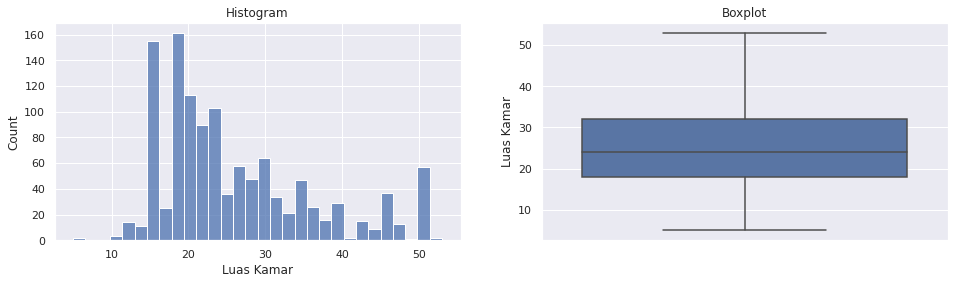


Kapasitas - Setelah Handling Outlier Capping

Skewness Value Kapasitas :  -0.06400449894379909


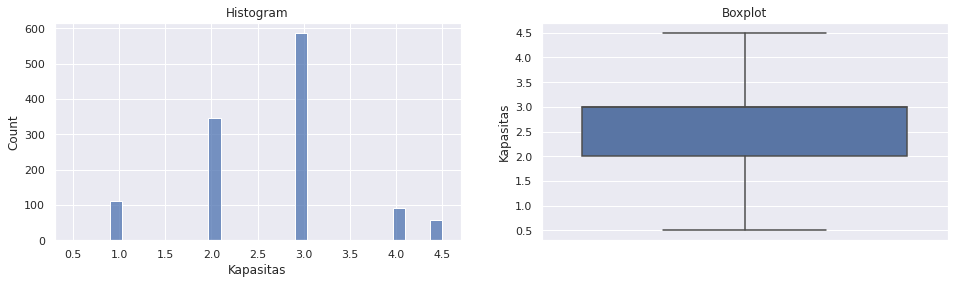


Rating - Setelah Handling Outlier Capping

Skewness Value Rating :  -0.26332961384883663


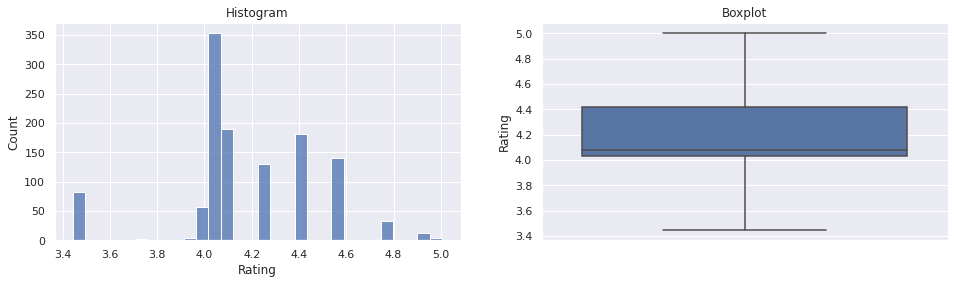

In [30]:
# Visualisasi Setelah Handling Outlier
print('\nLuas Kamar - Setelah Handling Outlier Capping')
print('\nSkewness Value Luas Kamar : ', X_trainn['Luas Kamar'].skew())
diagnostic_plots(X_trainn, 'Luas Kamar')

print('\nKapasitas - Setelah Handling Outlier Capping')
print('\nSkewness Value Kapasitas : ', X_trainn['Kapasitas'].skew())
diagnostic_plots(X_trainn, 'Kapasitas')

print('\nRating - Setelah Handling Outlier Capping')
print('\nSkewness Value Rating : ', X_trainn['Rating'].skew())
diagnostic_plots(X_trainn, 'Rating')

Berdasarkan hasil handling outlier, bahwa fitur kapasitas, luas kamar dan rating, semua datanya berdistribusi normal karena memiliki nilai skewness yang sesuai standarnya. Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2. Sedangkan Visualisasi boxplot fitur data numerik berupa Luas Kamar, Kapasitas dan Rating sudah tidak terdapat oulier karena tidak ada data yang keluar dari boxplot.

In [31]:
# Diperoleh X_trainn yang sudah dilakukan feature engineering 
# Variabel X_trainn sudah bersih dari Missing Value dan Outlier
X_trainn

,Nama Hotel,Nama Kota,Provinsi,Luas Kamar,Kapasitas,Rating
348,deMIRA Hotel Gubeng Surabaya,Kota Surabaya,Jawa Timur,27.0,2.0,4.42
78,Swiss-Belinn Wahid Hasyim,Kota Jakarta Pusat,Daerah Khusus Ibukota Jakarta,20.0,2.0,4.25
179,DeRain Hotel Bandung,Kota Bandung,Jawa Barat,26.0,2.0,4.25
142,favehotel Braga Bandung,Kota Bandung,Jawa Barat,16.0,3.0,4.08
1331,Tulip Guest House,Kota Batu,Jawa Timur,28.0,3.0,4.58
...,...,...,...,...,...,...
1393,Bumbangku Beach Cottages Bar & Restaurant,Kabupaten Lombok Tengah,Nusa Tenggara Barat,44.0,3.0,4.58
1344,The Cakra Hotel,Kota Denpasar,Bali,28.0,3.0,4.42
527,CREW EXPRESS Hotel,Kabupaten Deli Serdang,Sumatera Utara,16.0,2.0,4.25
1149,The Sun Boutique Hotel Kuta,Kabupaten Badung,Bali,23.0,2.0,4.25


Sehingga di peroleh variabel baru berupa X_train dan X_test yang bersih dari missing value dan outlier.

## 5f - Pemisahan Kolom Numerik dan Kategorik

Pada data harga hotel, terdapat perbedaan karakterstik data pada masing-masing fitur, oleh karena itu harus dilakukan pemisahan kategorik dan numerik.

In [32]:
# Pipeline

# Pemisahan data numerik dan data kategorik
num_fitur = X_trainn._get_numeric_data().columns.tolist()
col_fitur = X_trainn.select_dtypes(include=['object']).columns.tolist()

# Melakukan standarisasi range data numerik dan kategorik, agar mempunyai range yang sama antar fitur
num_col = Pipeline([("numscaler",MinMaxScaler())])
cat_col = Pipeline([("catscaler",OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Prosesing data numrik dan kategorik yang telah sama rangenya
preprocessor = ColumnTransformer(
    transformers=[
        ("numerik", num_col, num_fitur),
        ("kategorik", cat_col, col_fitur)])

Dilakukan proses pemisahan sesuai jenis data dari masing-masing fitur, teridentifikasi kolom fitur Kapsitas, luas kamar dan rating merupakan kolom numerik. Fitur Nama Hotel, Provinsi dan Kota merupakan kolom kategorik.

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [33]:
# Model definisi untuk algoritma regresi linear
pipeLinReg = Pipeline([("LogScaler",preprocessor),("LogReg",LinearRegression())])

Model definition menggunakan pipeline untuk scaling/encoder data yang akan di hitung model Linear Regression.

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [34]:
# Model training regresi linear tanpa estimator terbaik
model_Lin_Reg = pipeLinReg.fit(X_trainn,y_train)

Model training untuk regresi linear terhadap data training dan testing.

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [35]:
# Performa evaluation Model Regresi linear
y_pred_train_LinReg = model_Lin_Reg.predict(X_trainn)
y_pred_test_LinReg = model_Lin_Reg.predict(X_test)

In [36]:
# Hasil evaluasi model prediksi harga hotel
print('MAE train = ', mean_absolute_error(y_train, y_pred_train_LinReg ))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test_LinReg))

print('MSE train = ', mean_squared_error(y_train, y_pred_train_LinReg ))
print('MSE test = ', mean_squared_error(y_test,y_pred_test_LinReg))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_LinReg )))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_LinReg)))

print('r2score train = ', r2_score(y_train, y_pred_train_LinReg ))
print('r2score test = ', r2_score(y_test, y_pred_test_LinReg))

MAE train =  2.2656062380379476e-09
MAE test =  525353.9446875333
MSE train =  8.901190688236278e-18
MSE test =  1772885115690.2805
RMSE train =  2.98348633116297e-09
RMSE test =  1331497.3209474664
r2score train =  1.0
r2score test =  0.09959763901576035


Ketepatan atau akurasi model regresi linear berdasrkan nilai R2 tanpa estimator terbaik memiliki nilai training sebesar 100% dan testing sebesar 9%, artinya masih di kategorikan underfit, karena rentang nilai jauh berbeda. Berdasarkan perbedaan R2 model tanpa estimator terbaik tidak berkerja dengan baik dalam memprediksi kisaran harga hotel.

# 9 - Model Saving

Model regresi linear di simpan, untuk proses deployment web aplikasi ClickSpace.

In [37]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# navigasi ke home folder
% cd /content/drive/MyDrive/

/content/drive/MyDrive


In [39]:
# cek folder yang ada ditempah kita sekarang
! ls

'Colab Notebooks'   fruit   kartun_cnn	 tf_milestone   tf_serving


In [40]:
# masuk ke tf_serving
% cd tf_milestone

/content/drive/MyDrive/tf_milestone


In [41]:
# model untuk deployment
import pickle
with open ('_hotel.pkl','wb') as model_file:
  pickle.dump(pipeLinReg, model_file)

# 10 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [42]:
# Sebelum inference kita tampilkan dulu data inference yang di awal
datainfernce

,Unnamed: 0,Nama Hotel,Nama Kota,Provinsi,Latitude,Longitude,Luas Kamar,Kapasitas,Rating,Harga
0,1109,Villa Puncak Garuda E16 - Prathivi,Kota Batu,Jawa Timur,-7.902774e+00,112.540084,50,6,4.75,575000
1,56,Hotel Santika Premiere Hayam Wuruk Jakarta,Kota Jakarta Barat,Daerah Khusus Ibukota Jakarta,-6.148480e+00,106.816778,22,3,4.58,835000
2,1030,Kuta Paradise,Kabupaten Lombok Tengah,Nusa Tenggara Barat,-8.894132e-01,116.285603,16,3,4.03,542700
3,550,The Palace Inn,Kota Medan,Sumatera Utara,3.586211e+00,98.666376,30,3,4.00,301205
4,861,Maya Ubud Resort & Spa,Kabupaten Gianyar,Bali,-8.510000e-08,115.275434,44,3,4.75,4266766
5,1116,The Nyaman Bali,Kabupaten Badung,Bali,-8.730000e-08,115.172126,23,3,4.58,351500
6,647,Mahima Hotel,Kota Semarang,Jawa Tengah,-6.985492e+00,110.372531,24,3,4.03,558000
7,1263,Se.juk Residence Araya,Kabupaten Malang,Jawa Timur,-7.940000e+00,112.671534,17,1,4.42,205000
8,87,Asyana Kemayoran Jakarta,Kota Jakarta Pusat,Daerah Khusus Ibukota Jakarta,-6.165128e+00,106.841667,18,2,4.42,417690
9,1451,Mangsit Suite by Holiday Resort Lombok,Kabupaten Lombok Barat,Nusa Tenggara Barat,-8.490000e+00,116.047299,50,5,4.05,1755000


In [43]:
# Menghapus fitur-fitur yang tidak digunakan, hanya mengunakan fitur yang diduga mempengaruhi target
datainfernce.drop(["Unnamed: 0","Latitude","Longitude"], axis=1, inplace=True)

In [44]:
# Predict using Linear Regression untuk data inference
y_pred_inf_LinReg = model_Lin_Reg.predict(datainfernce)
y_pred_inf_LinReg = pd.DataFrame(y_pred_inf_LinReg, columns=['Pred-LinReg-HargaHotel'])
y_pred_inf_LinReg 

,Pred-LinReg-HargaHotel
0,7.978041e+05
1,7.330432e+05
2,4.867640e+05
3,2.551212e+05
4,1.518462e+06
5,1.394031e+06
6,3.468314e+05
7,5.758553e+05
8,8.084086e+05
9,5.516676e+05


In [45]:
# Merge/mengabungkan data scaling/encoder dengan prediksi harga hotel
pd.concat([datainfernce,y_pred_inf_LinReg ], axis=1)

,Nama Hotel,Nama Kota,Provinsi,Luas Kamar,Kapasitas,Rating,Harga,Pred-LinReg-HargaHotel
0,Villa Puncak Garuda E16 - Prathivi,Kota Batu,Jawa Timur,50,6,4.75,575000,7.978041e+05
1,Hotel Santika Premiere Hayam Wuruk Jakarta,Kota Jakarta Barat,Daerah Khusus Ibukota Jakarta,22,3,4.58,835000,7.330432e+05
2,Kuta Paradise,Kabupaten Lombok Tengah,Nusa Tenggara Barat,16,3,4.03,542700,4.867640e+05
3,The Palace Inn,Kota Medan,Sumatera Utara,30,3,4.00,301205,2.551212e+05
4,Maya Ubud Resort & Spa,Kabupaten Gianyar,Bali,44,3,4.75,4266766,1.518462e+06
5,The Nyaman Bali,Kabupaten Badung,Bali,23,3,4.58,351500,1.394031e+06
6,Mahima Hotel,Kota Semarang,Jawa Tengah,24,3,4.03,558000,3.468314e+05
7,Se.juk Residence Araya,Kabupaten Malang,Jawa Timur,17,1,4.42,205000,5.758553e+05
8,Asyana Kemayoran Jakarta,Kota Jakarta Pusat,Daerah Khusus Ibukota Jakarta,18,2,4.42,417690,8.084086e+05
9,Mangsit Suite by Holiday Resort Lombok,Kabupaten Lombok Barat,Nusa Tenggara Barat,50,5,4.05,1755000,5.516676e+05


# 11 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Memprediksi kisaran harga hotel yang harus dikeluarkan saat memilih hotel atau penginapan dengan memberikan informasi harga, dimana memuat informasi-informasi penting berupa kisaran harga berdasarkan fitur Nama Hotel, Nama Kota, Provinsi, Latitude, Longitude, Luas Kamar, Kapasitas	dan Rating menggunakan metode regresi linear.

---
> Exploratory Data Analysis (EDA)

1. Berdasarkan hasil visualisasi bahwa terdapat beberapa provinsi di indonesia yang bisa memprediksi kisaran harga hotel yaitu Daerah Khusus Ibukota Jakarta, Banten, Jawa Barat, Jawa Timur, Daerah Istimewa Yogyakarta, Special Region of Yogyakarta, Sumatera Utara, Jawa Tengah, Bali, Nusa Tenggara Barat, Central Java. Diaman Provinsi Jawa timur lebih memiliki banya referensi tempat hotel yang bisa menjadi pilihan untuk tempat menginap dibandingkan provinsi lainnya, urutan kedua provinsi bali sebagai jumlah hotel yang memiliki beberapa referensi tempat penginapan, lalu diikuti beberapa provinsi lainnya. Kabupaten Bandung menempati tempat terakhir yang memiliki sediki tempat hotel yang bisa di inap oleh parawisataan.
2. Berdasarkan hasil visualisasi bahwa terdapat beberapa kota di indonesia yang bisa memprediksi kisaran harga hotel yaitu Kota Jakarta Selatan, Kota Jakarta Pusat, Kota Jakarta Barat, Kota Jakarta Timur, Kota Jakarta Utara, Kota Tangerang, Kota Bekasi, Kota Bandung Kabupaten Bandung Barat, Kabupaten Subang, Kabupaten Sumedang, Kabupaten Bandung, Kota Cimahi, Kota Surabaya, Kabupaten Sidoarjo, Kabupaten Sleman, Kota Yogyakarta, Kabupaten Bantul, Kabupaten Gunung Kidul, Kota Medan, Kabupaten Deli Serdang, Kota Semarang, Kabupaten Semarang, Kota Malang, Kabupaten Malang, Kota Batu, Kabupaten Magelang, Kabupaten Badung, Kabupaten Gianyar, Kabupaten Buleleng,
Kabupaten Lombok Barat, Kabupaten Lombok Tengah,
Kota Mataram, Kabupaten Lombok Pusat, Kota Denpasar,
Kabupaten Lombok Utara, Kuta, Kuta Lombok,
Kabupaten Jembrana, Kabupaten Klungkung,
Kabupaten Lombok Timur, Lombok, Kabupaten Karangasem,
Kabupaten Bangli, Kabupaten Tabanan, Kota Cirebon,
Kabupaten Cirebon.

---
> Evaluation Model Algoritma

1. Berdasarkan hasil Ketepatan atau akurasi model regresi linear berdasrkan nilai R2 tanpa estimator terbaik memiliki nilai training sebesar 100% dan testing sebesar 9%, artinya masih di kategorikan underfit, karena rentang nilai jauh berbeda. Berdasarkan perbedaan R2 model tanpa estimator terbaik tidak berkerja dengan baik dalam memprediksi kisaran harga hotel.
2. Model evaluasi untuk training memiliki nilai mendekati 0.

---
Saran
1. Bisa menambah fitur yang sekirannya memiliki pengaruh baik terhadap model harga hotel
2. Bisa menggunakan data yang lebih size baris dan kolom nya, agar bisa lebih mewakili harga kote di indonesia saat ini.
3. Bisa menambah beberapa provinsi lagi yang ada di indonesia, menggunakan data kisaran harga hotel di 34 provinsi Indonesia.